# Project: Investigate a Dataset (No Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **In this project I will be analyzing a dataset containing medical appointments in Brazil focused on predicting whether patients showed up for their appointment or not. This dataset contains 110,527 medical appointments and its 14 related variables which are represented by the columns.** 
>
> This investigation will be looking closely at some specific columns to see how it directly affect while patients showed  up for their appointment or not
<ul>
    <li>Gender
    <li>Age
    <li>Neighbourhood
    <li>Scholarship
    <li>Hipertension
    <li>Diabetes
    <li>Alcoholism
    <li>Handcap
    <li>SMS_received
<ul>

In [1]:
# importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loading and viewing the dataset
med_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
med_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Checking the size of the data
print("This dataset contains {0} columns and {1} rows".format(med_df.shape[0], med_df.shape[1]))

This dataset contains 110527 columns and 14 rows


In [4]:
# Summary statistics
med_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics it can be observe that there is negative age which is not possible, while there is a wide gap btw the 75th percentile and the maximum age.

In [5]:
# Checking the datatypes
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It can be observed from the data that there are 9 numerical features and 5 categorical features and there are no missing values, also the ScheduledDay and AppointmentDay column both have a incorrect datatypes. Lastly,the ProjectId, AppintmentID columns won't be relevant for our investigation so we will drop it.

In [6]:
med_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [7]:
# Confirming if the columns has been dropped
med_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# Checking unique features for each variables 
med_df.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

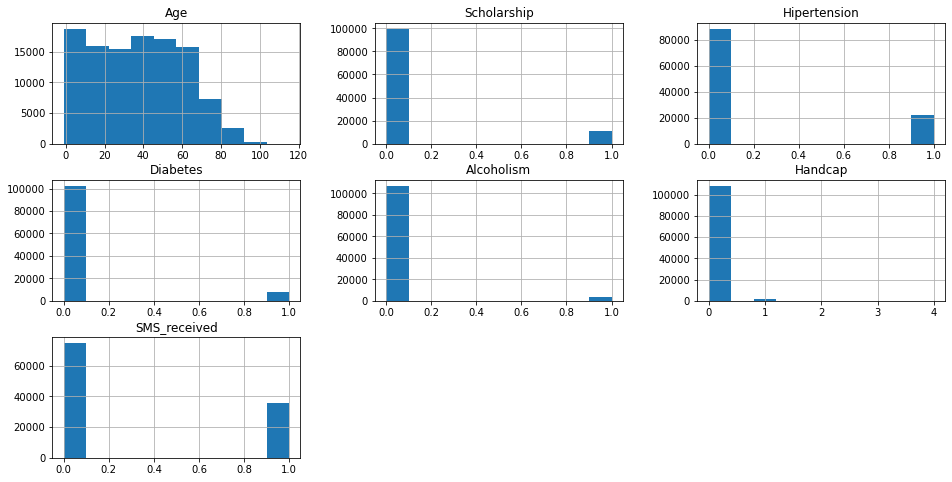

In [9]:
# Visualizing our dataset to have an overview
med_df.hist(figsize=(16,8));

### Data Cleaning

In [10]:
# Fixing Incorrect datatypes
med_df['ScheduledDay'] = pd.to_datetime(med_df['ScheduledDay'])
med_df['AppointmentDay'] = pd.to_datetime(med_df['AppointmentDay'])

# Confirming the datatypes
med_df.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [11]:
# Looking closely at the Age column
med_df['Age'].sort_values().unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [12]:
# Dropping row with negative age
neg_age = med_df.query('Age == -1').index
neg_age

Int64Index([99832], dtype='int64')

In [13]:
med_df.drop(neg_age, inplace=True)

In [14]:
# Check for duplicates
med_df.duplicated().sum()

635

In [15]:
# Dropping duplicate data
med_df.drop_duplicates(inplace=True)

In [16]:
med_df.shape

(109891, 12)

In [17]:
# Re-encoding the no-show column
dict = {'No':'present', 'Yes':'absent'}
med_df['No-show'].replace(dict, inplace = True)


In [18]:
med_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,present
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,present
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,present
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,present
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,present


In [19]:
# Grouping of the Age column into category
bin_ages = [0,12,19,40,115]
bin_labels = ['children', 'teenagers', 'young_adults', 'adults']
# Where  0 rep children, 1 rep teenagers, 2 rep young_adults, 3 rep adults
med_df['Age_levels'] = pd.cut(med_df['Age'], bin_ages, labels=bin_labels)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [20]:
# Looking into the No-show column to see the percentage of patients that showed for appointments
no_show_stat = med_df['No-show'].value_counts(normalize=True)*100
no_show_stat

present    79.890983
absent     20.109017
Name: No-show, dtype: float64

It can be observe that about 80% of the patients showed up for their appointment while 20% of the patients didn't show up

Text(0, 0.5, 'Percentage(%')

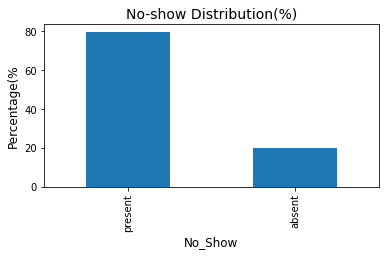

In [21]:
no_show_stat.plot(kind='bar', figsize=(6,3))
plt.title("No-show Distribution(%)", fontsize=14)
plt.xlabel("No_Show", fontsize=12)
plt.ylabel("Percentage(%", fontsize=12)

### Research Question 1 (What factors are Important to know in order to predict if a patient will show up for their appointment schedule)

In [22]:
med_df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Age_levels'],
      dtype='object')

No-show
absent     0.115667
present    0.093914
Name: Scholarship, dtype: float64


Text(0, 0.5, 'Scholarship(average)')

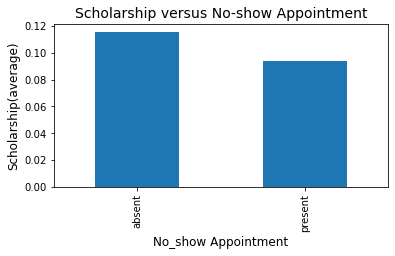

In [23]:
# Checking the correlation between Scholarship and No-show column 
med_df.groupby('No-show')['Scholarship'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['Scholarship'].mean())
plt.title('Scholarship versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('Scholarship(average)', fontsize=12)

No-show
absent     0.442755
present    0.292711
Name: SMS_received, dtype: float64


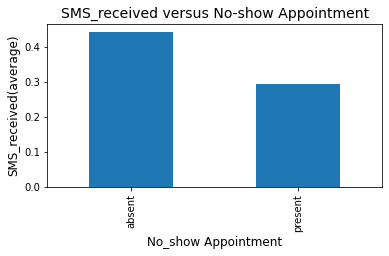

In [24]:
# Checking the correlation between SMS_received and No-show column 
med_df.groupby('No-show')['SMS_received'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['SMS_received'].mean())
plt.title('SMS_received versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('SMS_received(average)', fontsize=12);

No-show
absent     0.168703
present    0.204435
Name: Hipertension, dtype: float64


Text(0, 0.5, 'Hipertension(average)')

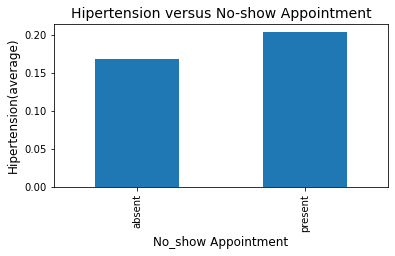

In [25]:
# Checking the correlation between Hipertension and No-show column 
med_df.groupby('No-show')['Hipertension'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['Hipertension'].mean())
plt.title('Hipertension versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('Hipertension(average)', fontsize=12)

No-show
absent     0.064350
present    0.073707
Name: Diabetes, dtype: float64


Text(0, 0.5, 'Diabetes(average)')

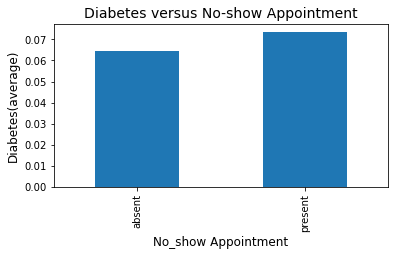

In [26]:
# Checking the correlation between Diabetes and No-show column 
med_df.groupby('No-show')['Diabetes'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['Diabetes'].mean())
plt.title('Diabetes versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('Diabetes(average)', fontsize=12)

No-show
absent     0.030229
present    0.030481
Name: Alcoholism, dtype: float64


Text(0, 0.5, 'Alcoholism(average)')

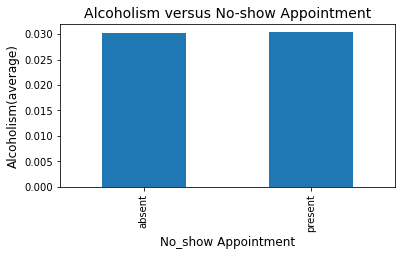

In [27]:
# Checking the correlation between Alcoholism and No-show column 
med_df.groupby('No-show')['Alcoholism'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['Alcoholism'].mean())
plt.title('Alcoholism versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('Alcoholism(average)', fontsize=12)

No-show
absent     0.020138
present    0.022633
Name: Handcap, dtype: float64


Text(0, 0.5, 'Handcap(average)')

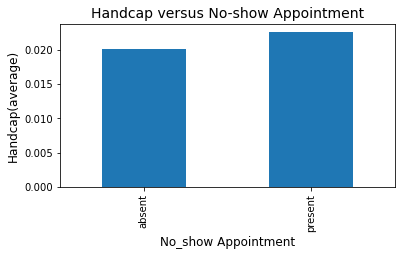

In [28]:
# Checking the correlation between Handcap and No-show column 
med_df.groupby('No-show')['Handcap'].mean().plot(kind='bar', figsize=(6,3))
print(med_df.groupby('No-show')['Handcap'].mean())
plt.title('Handcap versus No-show Appointment', fontsize=14)
plt.xlabel('No_show Appointment', fontsize=12)
plt.ylabel('Handcap(average)', fontsize=12)

### Research Question 2  (What Age Category is mostly represented in the data? What  also )

In [29]:
# Re-encoding the no-show column
present = med_df['No-show'] == 'present'
absent = med_df['No-show'] == 'absent'

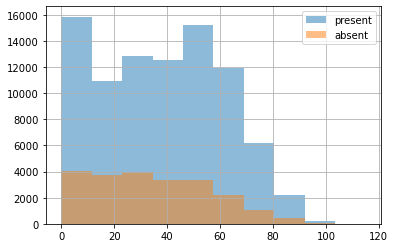

In [30]:
### Checking the Age Distribution
med_df.Age[present].hist(alpha=0.5,label='present')
med_df.Age[absent].hist(alpha=0.5,label='absent')
plt.legend();

Age_levels
children        17418
teenagers        9304
young_adults    30059
adults          49580
Name: No-show, dtype: int64


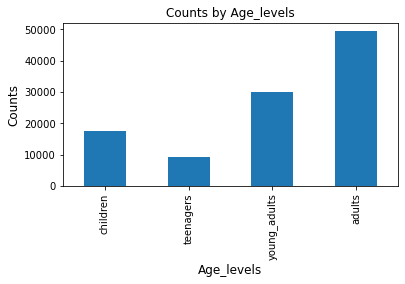

In [31]:
### Checking the Age_levels Distribution
print(med_df.groupby('Age_levels')['No-show'].count())
med_df.groupby('Age_levels')['No-show'].count().plot(kind='bar', title='Counts by Age_levels', figsize=(6,3))
plt.xlabel('Age_levels', fontsize=12)
plt.ylabel('Counts', fontsize=12);

Age_levels    Gender
children      F          8272
              M          9146
teenagers     F          6010
              M          3294
young_adults  F         21666
              M          8393
adults        F         33751
              M         15829
Name: No-show, dtype: int64


Text(0, 0.5, 'Counts')

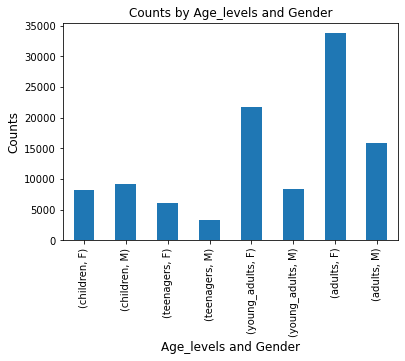

In [32]:
counts= med_df.groupby(['Age_levels', 'Gender']).count()['No-show']
print(counts)
counts.plot(kind='bar', title='Counts by Age_levels and Gender');
plt.xlabel('Age_levels and Gender', fontsize=12)
plt.ylabel('Counts', fontsize=12)

In [33]:
med_df.groupby(['No-show', 'Gender']).count()['Age_levels']

No-show  Gender
absent   F         14137
         M          7325
present  F         55562
         M         29337
Name: Age_levels, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **From Research Question 1 Charts**: 
> It can be observed that on the average people with underlying disease such as 
<ul>
  <li>Handcap
  <li>Diabetes
  <li>Hipertension
  <li>Alcoholism
<ul>

> tends to show up for their medical appointments compared to others with 
   
<ul>
  <li>Scholarship and others who received SMS 
<ul>

> **From Research Questions 2 Charts**: 
>The Adult population mostly populate the data and the female gender tends to get more medical appointment compared to the male population